In [ ]:
# 나눔글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 그래프 기본 글꼴 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# pandas 패키지 업데이트
!pip install --upgrade 'pandas>=1.4.0'

# 일곱째마당. 실전 데이터 분석 프로젝트

## 한국인의 삶 분석하기 (feat. 한국복지패널 데이터)

### '한국복지패널 데이터' 준비하기

* **'[한국복지패널 데이터](https://www.koweps.re.kr:442/data/data/list.do)'**는 한국보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지정책에 반영할 목적으로 발간하는 조사 자료
* 전국에서 7,000여 가구를 선정해 2006년부터 매년 추적 조사한 자료로, 경제활동, 생활실태, 복지욕구 등 천여 개의 변수로 구성되어 있음
* 다양한 분야의 연구자와 정책전문가들이 한국복지패널 데이터를 분석하여 논문과 연구보고서를 발표함

#### 데이터 분석 준비하기

##### 1. 데이터 준비하기

* [Koweps_hpwc14_2019_beta2.sav](https://bit.ly/Koweps_hpwc14_2019_beta2) 다운로드
* 실습용 데이터 폴더(`/data`)에 업로드를 진행

##### 2. 추가 패키지 설치

`.sav` 파일은 통계 분석 소프트웨어 SPSS 전용 파일로 pandas 기본 패키지에서는 불러올 수 없어 `pyreadstat` 모듈이 추가로 필요

In [ ]:
!pip install pyreadstat

##### 3. 데이터 불러오기

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/data-analytics-101/data/'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
welfare_raw = pd.read_spss(path + 'Koweps_hpwc14_2019_beta2.sav')

In [ ]:
welfare = welfare_raw.copy()

##### 4. 전체 데이터 검토하기

In [ ]:
welfare.head()

In [ ]:
welfare.tail()

In [ ]:
welfare.shape

In [ ]:
welfare.info()

In [ ]:
welfare.describe()

##### 5. 변수명 바꾸기

- 규모가 큰 조사 자료는 코드로 된 변수명과 값의 의미를 놓은 코드북(codebook)을 함께 제공
- 코드북을 활용하면 분석에 어떤 변수를 사용할지 등의 분석 방향에 대한 아이디어를 얻을 수 있음

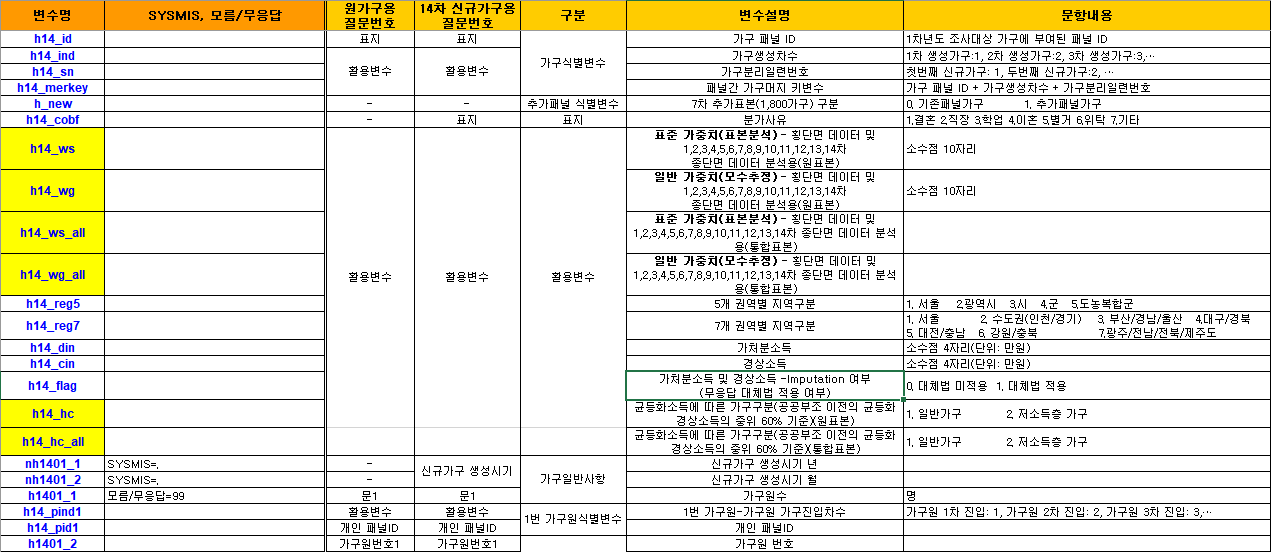

코드북을 참고하여 분석 프로젝트에 사용할 7개의 변수명을 쉬운 단어로 변경

In [ ]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

In [ ]:
welfare.info()  # 변수가 많아 자료 유형의 확인이 어려움

In [ ]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region']].info()

##### 데이터 분석 절차

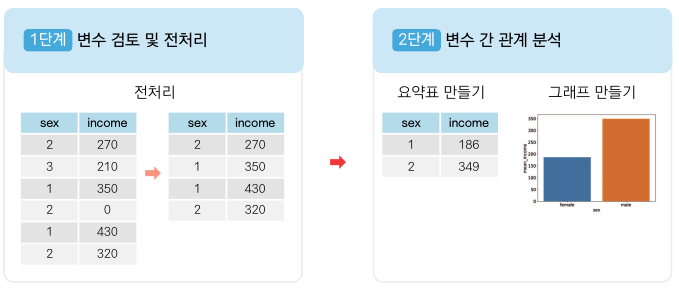

**1단계. 변수 검토 및 전처리**

- 변수의 특징을 파악하고 이상치와 결측치를 정제한 다음 변수의 값을 다루기 쉽게 변환

**2단계. 변수 간 관계 분석**

- 데이터를 요약한 표와 데이터의 특징을 쉽게 이해할 수 있는 그래프를 만든 다음 분석 결과를 해석

### 1) 성별에 따른 월급 차이 분석 - 성별에 따라 월급이 정말 다를까?

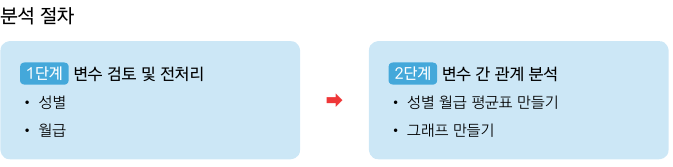

#### 성별 변수 검토 및 전처리하기

|sex|의미|
|-|-|
|1|남|
|2|여|
|9|모름/무응답|

In [ ]:
# 변수 타입 확인
welfare['sex'].dtypes

In [ ]:
# 이상치 확인
welfare['sex'].value_counts()

In [ ]:
# 이상치 결측 처리 (optional)
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

In [ ]:
# 성별을 직관적인 문자열로 치환
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

In [ ]:
# 빈도 막대 그래프
sns.countplot(data=welfare, x='sex')

#### 월급 변수 검토 및 전처리하기

|문항내용|모름/무응답|
|-|-|
|만원|9999|

In [ ]:
# 변수 타입 확인
welfare['income'].dtypes

In [ ]:
# 요약 통계량 구하기
welfare['income'].describe()

In [ ]:
# 히스토그램 그리기
sns.histplot(data = welfare, x = 'income')

In [ ]:
# 결측치 확인
welfare['income'].isna().sum()

In [ ]:
# 이상치 결측 처리 (optional)
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [ ]:
# 결측치 확인
welfare['income'].isna().sum()

#### 성별에 따른 월급 차이 분석하기

##### 1. 성별 월급 평균표 만들기

In [ ]:
# income 결측치 제거, 
# sex별 분리,
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

##### 2. 그래프 만들기

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')  

### 2) 나이와 월급의 관계 - 월급을 가장 많는 나이는 몇 살일까?

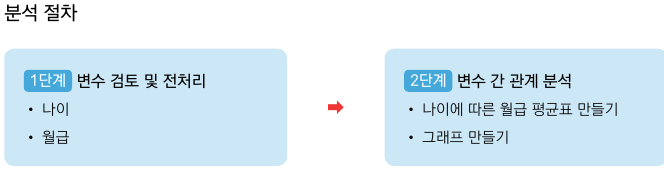

#### 나이 변수 검토 및 전처리하기

|문항내용|모름/무응답|
|-|-|
|만원|9999|

In [ ]:
# 변수 타입 확인
welfare['birth'].dtypes

In [ ]:
# 요약 통계량 구하기
welfare['birth'].describe()

In [ ]:
# 히스토그램 만들기
sns.histplot(data = welfare, x = 'birth')

In [ ]:
# 이상치 확인
welfare['birth'].describe()

In [ ]:
# 결측치 확인
welfare['birth'].isna().sum()

In [ ]:
# 이상치 결측 처리 (optional)
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

##### 파생변수 만들기 - 나이

In [ ]:
# 나이 변수 만들기
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [ ]:
# 요약 통계량 구하기
welfare['age'].describe()

In [ ]:
# 히스토그램 만들기
sns.histplot(data = welfare, x = 'age')

#### 나이와 월급의 관계 분석하기

##### 1. 나이에 따른 월급 평균표 만들기

In [ ]:
# income 결측치 제거
# age별 분리
# income 평균 구하기
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

##### 2. 그래프 만들기

In [ ]:
# 선 그래프 만들기
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')  

In [ ]:
# 막대 그래프 만들기?
sns.barplot(data = age_income, x = 'age', y = 'mean_income')  

### 3) 연령대에 따른 월급 차이 - 어떤 연령대가 월급이 가장 많을까?

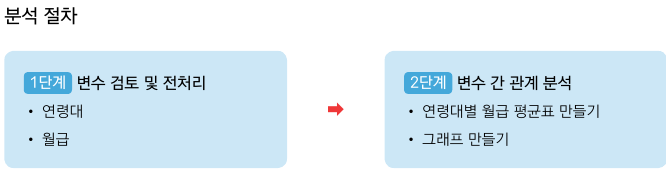

|범주|기준|
|-|-|
|초년층|30세 미만|
|중년층|30세 이상 60세 미만|
|장년층|60세 이상|

#### 연령대 변수 검토 및 전처리하기

In [ ]:
# 나이 변수 살펴보기
welfare['age'].head()

In [ ]:
# 파생변수 추가하기
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

In [ ]:
# 빈도 구하기
welfare['ageg'].value_counts()

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg')

#### 연령대에 따른 월급 차이 분석하기

##### 1. 연령대별 월급 평균표 만들기

In [ ]:
# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

##### 2. 막대 그래프 만들기

In [ ]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

In [ ]:
# 막대 순서 바꾸기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

#### 나이대별(10대, 20대, ...) 월급 차이 분석하기?

In [ ]:
age_income.head()

In [ ]:
# 나이대 파생변수 생성
age_income['age_group'] = age_income['age'] // 10 * 10
age_income.head()

In [ ]:
sns.barplot(data = age_income, x = 'age_group', y = 'mean_income')

### 4) 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

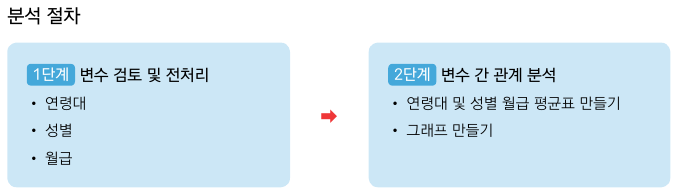

#### 연령대 및 성별 월급 차이 분석하기

##### 1. 연령대 및 성별 월급 평균표 만들기

In [ ]:
# income 결측치 제거
# ageg 및 sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

##### 2. 막대 그래프 만들기

In [ ]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

#### 나이 및 성별 월급 차이 분석하기

##### 1. 나이 및 성별 월급 평균표 만들기

In [ ]:
# income 결측치 제거
# age 및 sex별 분리
# income 평균 구하기
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

##### 2. 선 그래프 만들기

In [ ]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

### 5) 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

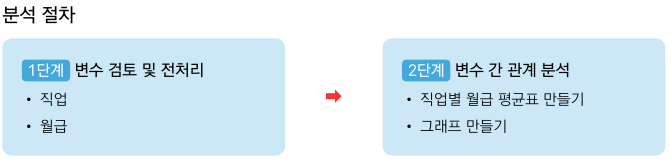

#### 직업 변수 검토 및 전처리하기

##### 1. 변수 검토하기

In [ ]:
welfare['code_job'].dtypes

In [ ]:
len(welfare['code_job'].unique())

In [ ]:
welfare['code_job'].value_counts()

##### 2. 전처리하기

In [ ]:
# 직업분류코드 목록 불러오기
list_job = pd.read_excel(path + 'Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

In [ ]:
list_job.shape

In [ ]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [ ]:
welfare[['age', 'sex', 'code_job', 'job']].head(10)

In [ ]:
# 결측치 확인
welfare['code_job'].isna().sum()

In [ ]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

In [ ]:
# 가장 많은 직업 10선
welfare['job'].value_counts().head(10)

#### 직업별 월급 차이 분석하기

##### 1. 직업별 월급 평균표 만들기

In [ ]:
# job, income 결측치 제거
# job별 분리
# income 평균 구하기
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

##### 2. 그래프 만들기

**(1) 월급이 많은 직업**

In [ ]:
# 상위 10위 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = top10, y = 'job', x = 'mean_income')

**(2) 월급이 적은 직업**

In [ ]:
# 하위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = bottom10, y = 'job', x = 'mean_income') \
   .set(xlim = [0, 800])

### 6) 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?

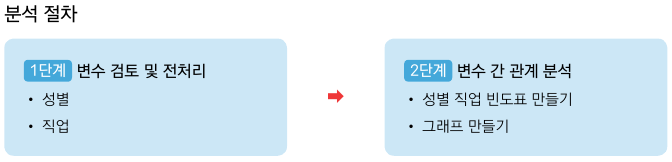

#### 성별 직업 빈도 분석하기

##### 1. 성별 직업 빈도표 만들기

**남성 직업 빈도 상위 10개 추출하기**

In [ ]:
# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

**여성 직업 빈도 상위 10개 추출**

In [ ]:
# job 결측치 제거
# female 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

##### 2. 그래프 만들기

In [ ]:
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

In [ ]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

### 7) 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

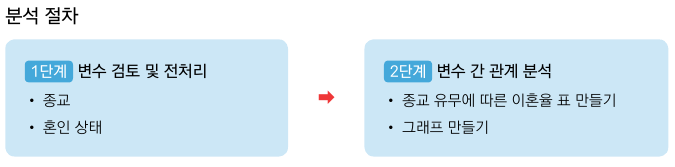

#### 종교 변수 검토 및 전처리하기

|값|내용|
|-|-|
|1|있음|
|2|없음|
|3|모름/무응답|

##### 1. 변수 검토하기

In [ ]:
welfare['religion'].dtypes

In [ ]:
welfare['religion'].value_counts()

##### 2. 전처리하기

In [ ]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

In [ ]:
# 빈도 구하기
welfare['religion'].value_counts()

In [ ]:
# 막대 그래프 만들기
sns.countplot(data = welfare, x = 'religion')

#### 혼인 상태 변수 검토 및 전처리하기

|값|내용|
|-|-|
|0|미해당(18세 미만)|
|1|유배우|
|2|사별|
|3|이혼|
|4|별거|
|5|미혼(18세이상, 미혼모 포함)|
|6|기타(사망 등)|

##### 1. 변수 검토하기

In [ ]:
# 변수 타입 출력
welfare['marriage_type'].dtypes  

In [ ]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

#### 2. 파생변수 만들기 - 이혼 여부

In [ ]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [ ]:
# marriage별 분리
# marriage별 빈도 구하기
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce.sort_values('n', ascending=False)

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n', order = ['marriage', 'divorce', 'etc'])

#### 종교 유무에 따른 이혼율 분석하기

##### 1. 종교 유무에 따른 이혼율표 만들기

In [ ]:
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

##### 2. 그래프 만들기

In [ ]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

#### 연령대 및 종교 유무에 따른 이혼율 분석하기

##### 1. 연령대별 이혼율표 만들기

In [ ]:
# etc 제외
# ageg별 분리
# marriage 추출
# 비율 구하기
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

In [ ]:
## 연령대 및 이혼 여부별 빈도

# etc 제외
# ageg별 분리
# marriage 추출
# 빈도 구하기
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

##### 2. 연령대별 이혼율 그래프 만들기

In [ ]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

##### 3. 연령대 및 종교 유무에 따른 이혼율표 만들기

In [ ]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
age_rel_div

##### 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기

In [ ]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)
age_rel_div

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

### 8) 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

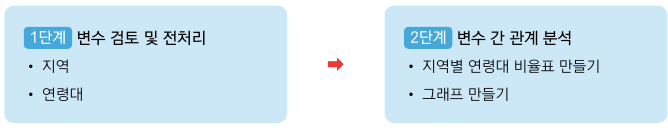

#### 지역 변수 검토 및 전처리하기

##### 1. 지역 변수 검토하기

|값|내용|
|-|-|
|1|서울|
|2|수도권(인천/경기)|
|3|부산/울산/경남|
|4|대구/경북|
|5|대전/충남|
|6|강원/충북|
|7|광주/전남/전북/제주도|

In [ ]:
welfare['code_region'].dtypes  # 변수 타입 출력

In [ ]:
welfare['code_region'].value_counts()  # 빈도 구하기

##### 2. 전처리하기


In [ ]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/울산/경남',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

In [ ]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

#### 지역별 연령대 비율 분석하기

##### 1. 지역별 연령대 비율표 만들기


In [ ]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

#### 2. 그래프 만들기

In [ ]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

##### 3. 누적 비율 막대 그래프 만들기

**(1) 피벗하기**

**피벗(pivot)**: 행과 열을 회전해 표의 구성을 바꾸는 작업

* `pd.pivot()` 함수를 가지고 데이터 프레임을 피벗할 수 있음

In [ ]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

**(2) 그래프 만들기**

In [ ]:
# 세로 누적 막대 그래프 만들기
pivot_df.plot.bar(stacked = True)

In [ ]:
# 가로 누적 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)

**(3) 막대 정렬하기**

In [ ]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

In [ ]:
# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True)